### 题目

```
1.数据合成:600000SH_tick.mat数据合成一分钟数据，一分钟数据合成15 30 60分钟；
(提示:先清洗数据)；

扩展：计算上证指数每一日的平均涨幅，每一个月的平均涨幅

```

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import QUANTAXIS as QA
import talib as ta
import datetime

from scipy.io.matlab import loadmat

In [71]:
from datetime import time

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

### 导入数据

In [3]:
data_mat = loadmat('tick_sample.mat')

In [10]:
code = data_mat['codes'][0,0][0][:6]

In [41]:
date = [data_mat['times'].ravel()[i][0] for i in range(data_mat['times'].shape[0])]

In [46]:
date = pd.to_datetime(date)

In [48]:
data = pd.DataFrame(data_mat['data'])

In [53]:
data.index = date
data.columns = ['price', 'vol']

In [54]:
data.tail()

,price,vol
2016-05-12 14:22:53,17.44,12193620.0
2016-05-12 14:22:56,17.44,12193620.0
2016-05-12 14:22:59,17.44,12193620.0
2016-05-12 14:23:02,17.44,12193820.0
2016-05-12 14:23:05,17.45,12198720.0


### 合成数据

In [55]:
tick = data.copy()

In [56]:
tick = tick.assign(amount=tick.price * tick.vol)

In [57]:
resx = pd.DataFrame()

In [58]:
_temp = set(tick.index.date)

In [63]:
len(_temp)

8

In [65]:
_temp

{datetime.date(2016, 5, 3),
 datetime.date(2016, 5, 4),
 datetime.date(2016, 5, 5),
 datetime.date(2016, 5, 6),
 datetime.date(2016, 5, 9),
 datetime.date(2016, 5, 10),
 datetime.date(2016, 5, 11),
 datetime.date(2016, 5, 12)}

In [68]:
for i in _temp:
    print(str(i))

2016-05-12
2016-05-11
2016-05-04
2016-05-10
2016-05-05
2016-05-03
2016-05-09
2016-05-06


In [ ]:
for item in _temp:
    _data = tick.loc[str(item)]
    _data1 = _data[time(9, 31) : time(11, 30)].resample(
        )

In [72]:
tick.loc[time(9, 31) : time(11, 30)]

,price,vol,amount
2016-05-03 09:31:01,17.96,411324.0,7.387379e+06
2016-05-03 09:31:04,17.94,427300.0,7.665762e+06
2016-05-03 09:31:07,17.94,454600.0,8.155524e+06
2016-05-03 09:31:10,17.94,454700.0,8.157318e+06
2016-05-03 09:31:13,17.94,454700.0,8.157318e+06
2016-05-03 09:31:16,17.93,458020.0,8.212299e+06
2016-05-03 09:31:19,17.93,461400.0,8.272902e+06
2016-05-03 09:31:22,17.91,465220.0,8.332090e+06
2016-05-03 09:31:25,17.91,465220.0,8.332090e+06
2016-05-03 09:31:28,17.95,468420.0,8.408139e+06


In [73]:
test = tick.loc['2016-05-06']

In [77]:
test.head()

,price,vol,amount
2016-05-06 09:14:45,0.0,0.0,0.0
2016-05-06 09:14:51,0.0,0.0,0.0
2016-05-06 09:15:00,0.0,0.0,0.0
2016-05-06 09:15:15,0.0,0.0,0.0
2016-05-06 09:15:44,0.0,0.0,0.0


In [96]:
test1 = test.loc[time(9, 31) : time(11, 30)].resample(
    '1min',  closed='right', base=30, loffset='1min').apply({
    'price':'ohlc', 'vol':lambda x : x.max() - x.min(),
    'amount':lambda x : x.max() - x.min()
})

In [97]:
test2 = test.loc[time(13,1):time(15,0)].resample(
    '1min', closed='right', base=30, loffset='1min').apply({
    'price':'ohlc', 'vol':lambda x:x.max()-x.min(),
    'amount':lambda x:x.max()-x.min()
})

In [99]:
test1.tail()

price                            vol      amount
                      open   high    low  close       vol      amount
2016-05-06 11:26:00  17.80  17.80  17.78  17.78  155521.0  2510868.84
2016-05-06 11:27:00  17.78  17.79  17.78  17.78  186100.0  3308858.00
2016-05-06 11:28:00  17.77  17.78  17.77  17.78   96600.0  1848198.48
2016-05-06 11:29:00  17.78  17.81  17.77  17.80   68500.0  1554286.44
2016-05-06 11:30:00  17.79  17.82  17.79  17.81   29200.0   784678.96

In [100]:
test1.columns.droplevel(0)

Index(['open', 'high', 'low', 'close', 'vol', 'amount'], dtype='object')

In [87]:
pd.DataFrame.first

In [89]:
pd.DataFrame.last??

In [101]:
tick_ = QA.QA_fetch_get_stock_transaction('pytdx', '000001', '2016-05-03', '2016-05-12')

QUANTAXIS>> Selecting the Best Server IP of TDX


DEFAULT STOCK IP is BAD, RETESTING
BAD RESPONSE 61.152.107.168
BAD RESPONSE 113.05.73.88
BAD RESPONSE 119.147.171.206
BAD RESPONSE 121.14.2.7
BAD RESPONSE 60.28.29.69
BAD RESPONSE 180.153.18.17
BAD RESPONSE 59.173.18.69
BAD RESPONSE 61.153.144.179
BAD RESPONSE 119.29.51.30
BAD RESPONSE 121.14.104.70
BAD RESPONSE 121.14.104.72
BAD RESPONSE 114.80.149.84
USING DEFAULT FUTURE IP


QUANTAXIS>> === The BEST SERVER ===
 stock_ip jstdx.gtjas.com future_ip 59.175.238.38
QUANTAXIS>> Successfully Getting 000001 history transaction data in day 2016-05-03
QUANTAXIS>> Successfully Getting 000001 history transaction data in day 2016-05-04
QUANTAXIS>> Successfully Getting 000001 history transaction data in day 2016-05-05
QUANTAXIS>> Successfully Getting 000001 history transaction data in day 2016-05-06
QUANTAXIS>> Successfully Getting 000001 history transaction data in day 2016-05-09
QUANTAXIS>> Successfully Getting 000001 history transaction data in day 2016-05-10
QUANTAXIS>> Successfully Getting 000001 history transaction data in day 2016-05-11
QUANTAXIS>> Successfully Getting 000001 history transaction data in day 2016-05-12


In [102]:
tick_.head()

,time,price,vol,buyorsell,date,datetime,code,order
datetime,,,,,,,,
2016-05-03 09:30:00,09:30,10.58,1344,2,2016-05-03,2016-05-03 09:30:00,000001,0
2016-05-03 09:30:00,09:30,10.58,40,0,2016-05-03,2016-05-03 09:30:00,000001,1
2016-05-03 09:30:00,09:30,10.58,41,0,2016-05-03,2016-05-03 09:30:00,000001,2
2016-05-03 09:30:00,09:30,10.58,3234,0,2016-05-03,2016-05-03 09:30:00,000001,3
2016-05-03 09:30:00,09:30,10.59,3,0,2016-05-03,2016-05-03 09:30:00,000001,4


In [103]:
QA.QA_fetch_get_stock_transaction??

### 计算上证指数日平均涨幅和月平均涨幅

In [111]:
sz_index_data = QA.QA_fetch_index_day_adv('000001', '1989-12-19','2018-10-01')

In [113]:
sz_index_daily_returns = sz_index_data.close.pct_change()[1:]

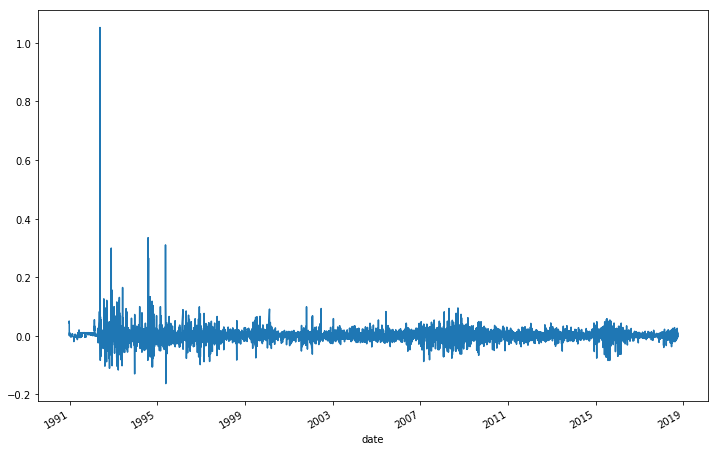

In [116]:
sz_index_daily_returns.xs('000001', level=1).plot();

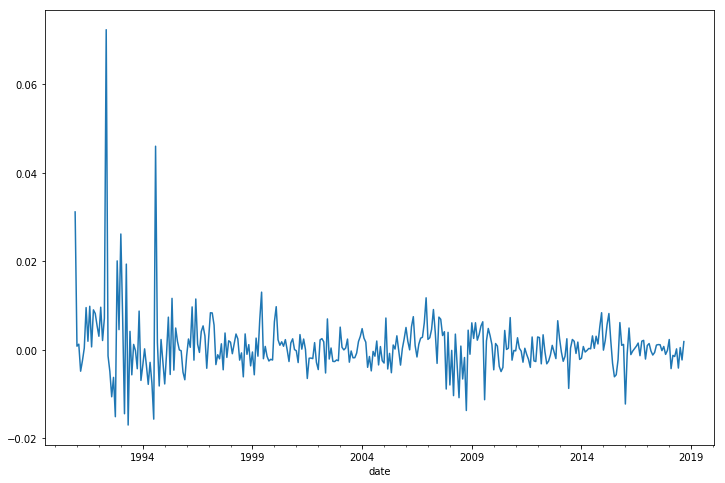

In [118]:
sz_index_daily_returns.xs('000001', level=1).resample('M').mean().plot();

In [123]:
sz_index_daily_returns.shape

(6774,)

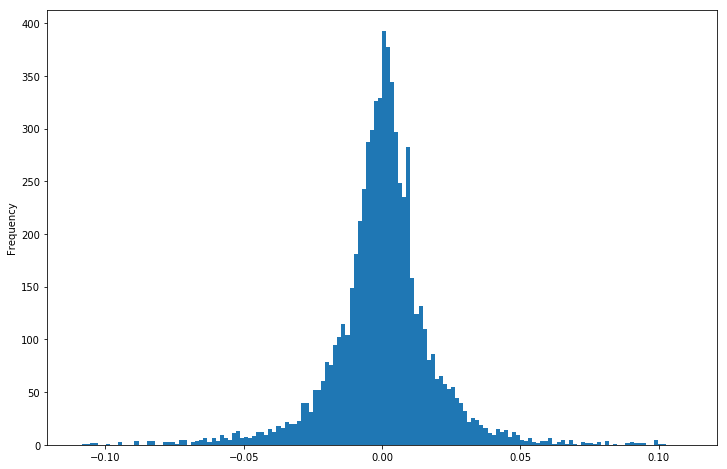

In [126]:
sz_index_daily_returns.plot.hist(bins=150, range=(-.11, .11));

#### 验证上证日回报是否服从正态分布

In [127]:
from statsmodels.stats.stattools import jarque_bera

In [132]:
jarque_bera(sz_index_daily_returns)

(64519152.87290184, 0.0, 12.193499874003324, 480.4871170566569)

p-value = 0.0 < 0.05, so the returns of the 000001 is not normally